In [1]:
import numpy as np
import copy
import time
import poly_tri_numba as ptn
from poly_tri_py import PolyTri as PolyTriPy
from poly_tri_numba import PolyTri as PolyTriNumb
import matplotlib.pyplot as plt


phi = np.linspace(0, 2 * np.pi, 200)[:-1]
outer_pts = np.array([np.cos(phi), np.sin(phi)]).T
inner_pts = copy.copy(outer_pts)
outer_pts *= np.array([1., 1.])
inner_pts *= 0.5
pts = np.array(list(inner_pts) + list(outer_pts))
boundaries = [list(range(len(inner_pts))) + [0]]

## traingulation of points

#### python

In [2]:
%%timeit
p = PolyTriPy(pts, holes=False, delaunay=False)

162 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


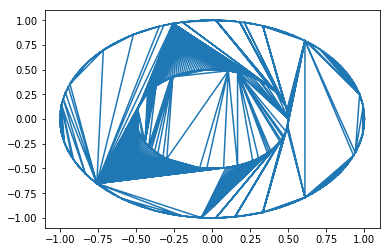

In [3]:
p = PolyTriPy(pts, holes=False, delaunay=False)
plt.triplot(*pts.T, p.get_tris())
plt.show()

#### numba

In [4]:
%%timeit
p = PolyTriNumb(pts, holes=False, delaunay=False)

34.7 ms ± 826 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


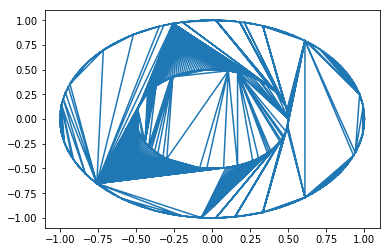

In [5]:
p = PolyTriPy(pts, holes=False, delaunay=False)
plt.triplot(*pts.T, p.get_tris())
plt.show()

## constraint triangulation + removing holes

#### python

In [6]:
%%timeit
p = PolyTriPy(pts, boundaries, holes=True, delaunay=False)

170 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


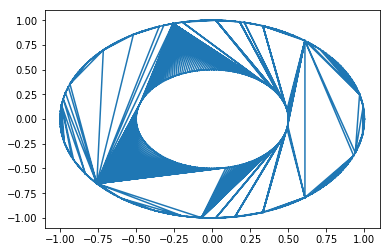

In [7]:
p = PolyTriPy(pts, boundaries, holes=True, delaunay=False)
plt.triplot(*pts.T, p.get_tris())
plt.show()

#### numba

In [8]:
%%timeit
p = PolyTriNumb(pts, boundaries, holes=True, delaunay=False)

41.6 ms ± 305 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


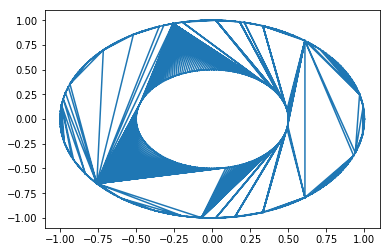

In [9]:
p = PolyTriPy(pts, boundaries, holes=True, delaunay=False)
plt.triplot(*pts.T, p.get_tris())
plt.show()

## delaunay triangulation

#### python

In [10]:
%%timeit
p = PolyTriPy(pts, holes=False, delaunay=True)

4.43 s ± 25.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


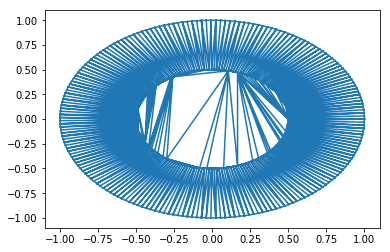

In [11]:
p = PolyTriPy(pts, holes=False, delaunay=True)
plt.triplot(*pts.T, p.get_tris())
plt.show()

#### numba

In [12]:
%%timeit
p = PolyTriNumb(pts, holes=False, delaunay=True)

774 ms ± 4.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


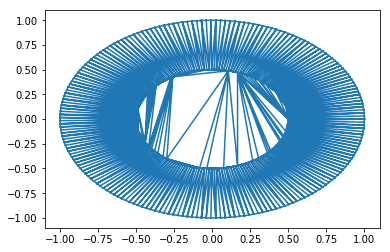

In [13]:
p = PolyTriNumb(pts, holes=False, delaunay=True)
plt.triplot(*pts.T, p.get_tris())
plt.show()

## constraint delaunay triangulation + removing holes

#### python

In [14]:
%%timeit
p = PolyTriPy(pts, boundaries, holes=True, delaunay=True)

4.46 s ± 52.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


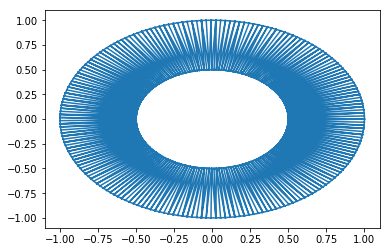

In [15]:
p = PolyTriPy(pts, boundaries, holes=True, delaunay=True)
plt.triplot(*pts.T, p.get_tris())
plt.show()

#### numba

In [16]:
%%timeit
p = PolyTriNumb(pts, boundaries, holes=True, delaunay=True)

790 ms ± 3.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


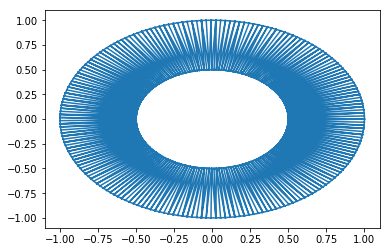

In [17]:
p = PolyTriNumb(pts, boundaries, holes=True, delaunay=True)
plt.triplot(*pts.T, p.get_tris())
plt.show()

In [18]:
def triangulize(num):
    phi = np.linspace(0, 2 * np.pi, num)[:-1]
    outer_pts = np.array([np.cos(phi), np.sin(phi)]).T
    inner_pts = copy.copy(outer_pts)
    outer_pts *= np.array([1., 1.])
    inner_pts *= 0.5
    pts = np.array(list(inner_pts) + list(outer_pts))
    boundaries = [list(range(len(inner_pts))) + [0]]
    t0 = time.time()
    p = PolyTriPy(pts, boundaries, holes=True, delaunay=False)
    return time.time()- t0

t1 = np.array([[i, triangulize(i)] for i in np.random.randint(10, 300, 100)])
    

In [19]:
def triangulize(num):
    phi = np.linspace(0, 2 * np.pi, num)[:-1]
    outer_pts = np.array([np.cos(phi), np.sin(phi)]).T
    inner_pts = copy.copy(outer_pts)
    outer_pts *= np.array([1., 1.])
    inner_pts *= 0.5
    pts = np.array(list(inner_pts) + list(outer_pts))
    boundaries = [list(range(len(inner_pts))) + [0]]
    t0 = time.time()
    p = PolyTriNumb(pts, boundaries, holes=True, delaunay=False)
    return time.time()- t0

t2 = np.array([[i, triangulize(i)] for i in np.random.randint(10, 300, 100)])
    

In [20]:
t2 = np.array([[i, triangulize(i)] for i in np.random.randint(10, 300, 100)])

In [21]:
from scipy.spatial import Delaunay

def triangulize(num):
    phi = np.linspace(0, 2 * np.pi, num)[:-1]
    outer_pts = np.array([np.cos(phi), np.sin(phi)]).T
    inner_pts = copy.copy(outer_pts)
    outer_pts *= np.array([1., 1.])
    inner_pts *= 0.5
    pts = np.array(list(inner_pts) + list(outer_pts))
    boundaries = [list(range(len(inner_pts))) + [0]]
    t0 = time.time()
    Delaunay(pts).simplices
    return time.time()- t0

t3 = np.array([[i, triangulize(i)] for i in np.random.randint(10, 300, 100)])

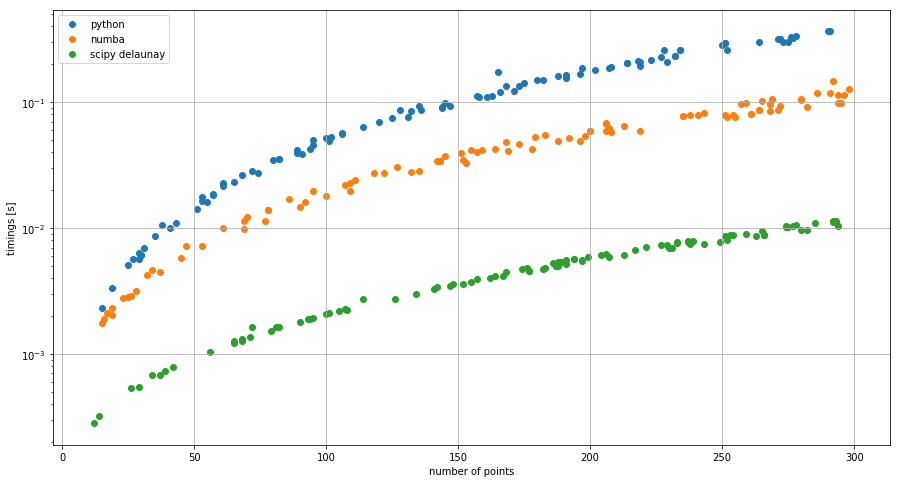

In [22]:
plt.figure(figsize=(15, 8))
plt.yscale("log")
plt.scatter(*t1.T, label="python")
plt.scatter(*t2.T, label="numba")
plt.scatter(*t3.T, label="scipy delaunay")
plt.legend()
plt.ylabel("timings [s]")
plt.xlabel("number of points")
plt.grid()